In [5]:
!pip install -q scikit-learn

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.keras.experimental as keras_exp


import tensorflow as tf

In [7]:
import pandas as pd

# Assuming dataset.csv is in the same directory as your notebook
file_path = "Titanic-Dataset.csv"

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# poping a rows
df.pop('Pclass')
print(df.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [9]:
# locating rows
print(df["Age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [10]:
# desribe the dataset using differnt parameters 
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# give number of rows and columns 

df.shape

(891, 11)

<Axes: >

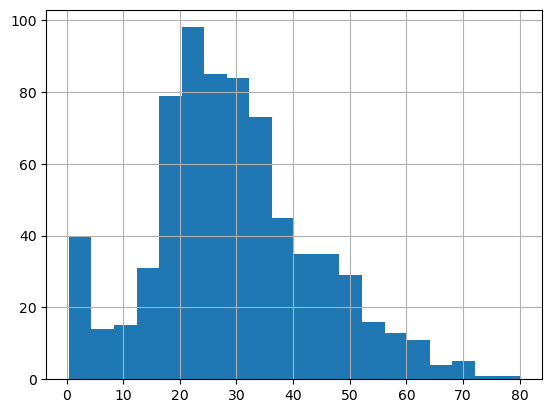

In [12]:
#histogram for representing the age 
df.Age.hist(bins=20)

<Axes: >

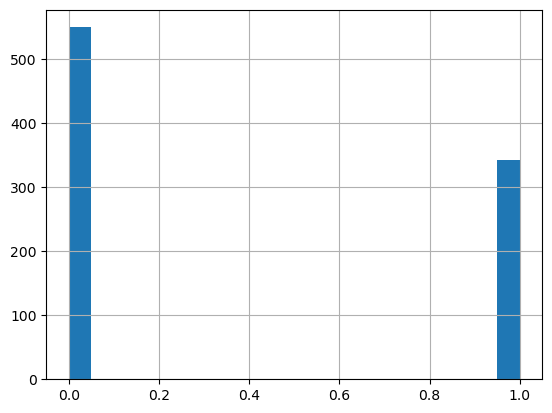

In [13]:
#histogram for the people survided
df.Survived.hist(bins=20)

<Axes: ylabel='Sex'>

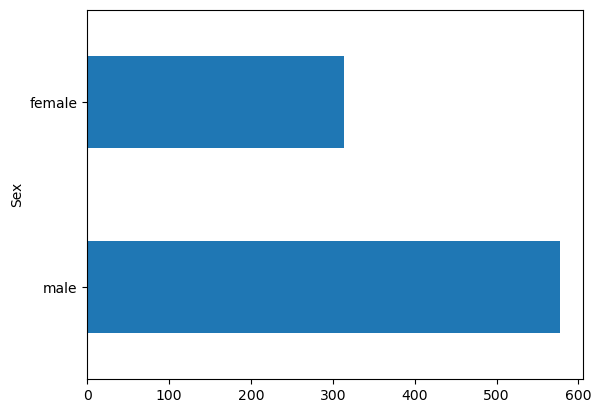

In [14]:
# number of male and female
df.Sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% Survived')

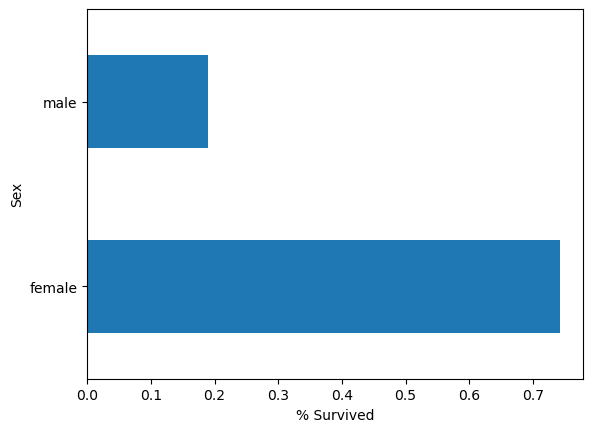

In [15]:
# percent of survival by their age
pd.concat([df],axis=1).groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% Survived')

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have loaded your dataset into a DataFrame named 'data'
# Replace 'data' with the actual variable name of your DataFrame if different

# Define features (X) and target variable (y)
X = df.drop(columns=['Survived'])  # Features excluding 'Survived'
y = df['Survived']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test for features and y_train, y_test for target variable
# You can use these datasets for training and testing your machine learning models


In [17]:
CATEGORICAL_COLUMNS=['Sex', 'Parch', 'Cabin','Embarked']  # Removed 'Embark' from categorical columns
NUMERIC_COLUMNS=['Age', 'Fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = df[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

    

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(0, 1, 2, 5, 3, 4, 6), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Cabin', vocabulary_list=(nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31

In [18]:
df[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [22]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
print(feature_columns)

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(0, 1, 2, 5, 3, 4, 6), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Cabin', vocabulary_list=(nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 

In [24]:
 # creating input function 
def make_input_fn(data_df,label_df,num_epochs=10, shuffle=True, batch_size=32):
    def input_function(): #inner function, this will be returned 
        ds=tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))# create tf.data.datase object with data
        if shuffle:
            ds=ds.shuffle(1000)
            ds=ds.batch(batch_size).repeat(num_epochs)
            return ds
        return input_function


train_input_fn=make_input_fn(df, y_train)
eval_input_fn=make_input_fn(dfeval,y_eval, num_epochs=1,shuffle=False)

NameError: name 'dfeval' is not defined

In [25]:
##Creating the model 
##linear models 


In [26]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\umami\\AppData\\Local\\Temp\\tmprp15j0uj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', 

In [27]:
#training the model 
linear_est.train(train_input_fn)
result=linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

TypeError: unsupported callable

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
file_path = "Titanic-Dataset.csv"  
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Drop non-numeric columns and irrelevant columns
data_numeric = data.select_dtypes(include=[np.number])

# Handle missing values
data_numeric.fillna(data_numeric.mean(), inplace=True)

# Step 3: Split the data into training and testing sets
X = data_numeric.drop(columns=['Survived'])  # Features
y = data_numeric['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the linear model
model = LogisticRegression()  
model.fit(X_train, y_train)

# Step 5: Evaluate the model's performance
y_pred = model.predict(X_test)

# Step 6: Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7318435754189944


NameError: name 'result' is not defined